In [1]:
import pandas as pd
import numpy as np
import re
from functools import reduce
import os
from pprint import pprint
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly
import ipywidgets as widgets
plotly.tools.set_credentials_file(username= 'ccarlevato', api_key='1DVsYRNGLWMHhCYQCetN')
import seaborn as sns
from IPython.display import display, clear_output, Image
from plotly.widgets import GraphWidget
#Activate Seaborn
sns.set(font_scale=1.5)
%matplotlib inline
%matplotlib nbagg

<IPython.core.display.Javascript object>

In [2]:
import plotly.plotly as py

In [3]:
# import plotly.graph_objs as go

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
print(os.listdir("./Data"))

['.ipynb_checkpoints', 'CDC_Nutrition__Physical_Activity__and_Obesity_-_Legislation (1).csv', 'Food_Atlas.csv', 'Food_Atlas.xls', 'Legislation Description.csv', 'Nutrition_Physical_Activity_and_Obesity_Behavioral_Risk_Factor_Surveillance_System.csv', 'Percent_of_adults_aged_18_and_older_who_have_obesity_National.csv', 'State_codes.csv', 'State_Law_Information.csv', 'tl_2018_us_state.cpg', 'tl_2018_us_state.dbf', 'tl_2018_us_state.prj', 'tl_2018_us_state.shp', 'tl_2018_us_state.shp.ea.iso.xml', 'tl_2018_us_state.shp.iso.xml', 'tl_2018_us_state.shx']


In [6]:
df_US_obesity = pd.read_csv('./Data/Nutrition_Physical_Activity_and_Obesity_Behavioral_Risk_Factor_Surveillance_System.csv')

In [7]:
Gender = ['Female', 'Male']
gender_obesity = df_US_obesity[df_US_obesity.Gender.isin(Gender)]
gender_obesity = gender_obesity[gender_obesity.Question =='Percent of adults aged 18 years and older who have obesity']


In [8]:
women_obesity = df_US_obesity[df_US_obesity.Gender == 'Female']
women_obesity = women_obesity[women_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
# women_obesity.head()

In [9]:
women_obesity = women_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')

In [10]:
women_obesity.columns = ['women_2011', 'women_2012', 'women_2013', 'women_2014', 'women_2015', 
                                'women_2016', 'women_2017']

In [11]:
male_obesity = df_US_obesity[df_US_obesity.Gender == 'Male']
male_obesity = male_obesity[male_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
male_obesity = male_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# male_obesity.head()

In [12]:
male_obesity.columns = ['men_2011', 'men_2012', 'men_2013', 'men_2014', 'men_2015', 
                                'men_2016', 'men_2017']

In [13]:
df_US_obesity = df_US_obesity.rename(columns = {'Age(years)': 'Age'})

In [14]:
age_18_to_24_obesity = df_US_obesity[df_US_obesity.Age == '18 - 24']
age_18_to_24_obesity =age_18_to_24_obesity[age_18_to_24_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
age_18_to_24_obesity = age_18_to_24_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# age_18_to_24_obesity.head()

In [15]:
age_18_to_24_obesity.columns = ['18_to_24_2011', '18_to_24_2012', '18_to_24_2013', '18_to_24_2014', '18_to_24_2015', 
                                '18_to_24_2016', '18_to_24_2017']


In [16]:
age_25_to_34_obesity = df_US_obesity[df_US_obesity.Age == '25 - 34']
age_25_to_34_obesity =age_25_to_34_obesity[age_25_to_34_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
age_25_to_34_obesity = age_25_to_34_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# age_25_to_34_obesity.head()

In [17]:
age_25_to_34_obesity.columns = ['25_to_34_2011','25_to_34_2012','25_to_34_2013','25_to_34_2014','25_to_34_2015',
                                '25_to_34_2016', '25_to_34_2017']

In [18]:
age_35_to_44_obesity = df_US_obesity[df_US_obesity.Age == '35 - 44']
age_35_to_44_obesity =age_35_to_44_obesity[age_35_to_44_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
age_35_to_44_obesity = age_35_to_44_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# age_35_to_44_obesity.head()

In [19]:
age_35_to_44_obesity.columns = ['35_to_44_2011','35_to_44_2012','35_to_44_2013','35_to_44_2014',
                                '35_to_44_2015','35_to_44_2016','35_to_44_2017']


In [20]:
age_45_to_54_obesity = df_US_obesity[df_US_obesity.Age == '45 - 54']
age_45_to_54_obesity =age_45_to_54_obesity[age_45_to_54_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
age_45_to_54_obesity = age_45_to_54_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# age_45_to_54_obesity.head()

In [21]:
age_45_to_54_obesity.columns = ['45_to_54_2011', '45_to_54_2012', '45_to_54_2013', '45_to_54_2014', 
                               '45_to_54_2015', '45_to_54_2016', '45_to_54_2017'] 

In [22]:
age_55_to_64_obesity = df_US_obesity[df_US_obesity.Age == '55 - 64']
age_55_to_64_obesity = age_55_to_64_obesity[age_55_to_64_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
age_55_to_64_obesity = age_55_to_64_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# age_55_to_64_obesity.head()

In [23]:
age_55_to_64_obesity.columns = ['55_to_64_2011','55_to_64_2012','55_to_64_2013','55_to_64_2014',
                               '55_to_64_2015','55_to_64_2016', '55_to_64_2017']

In [24]:
age_65_obesity = df_US_obesity[df_US_obesity.Age == '65 or older']
age_65_obesity = age_65_obesity[age_65_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
age_65_obesity = age_65_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# age_65_obesity.head()

In [25]:
age_65_obesity.columns = ['65_2011', '65_2012','65_2013','65_2014',
                          '65_2015','65_2016','65_2017']

In [26]:
lessthan_highschool_obesity = df_US_obesity[df_US_obesity.Education == 'Less than high school']
lessthan_highschool_obesity = lessthan_highschool_obesity[lessthan_highschool_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
lessthan_highschool_obesity= lessthan_highschool_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# lessthan_highschool_obesity.head()

In [27]:
lessthan_highschool_obesity.columns = ['lessthan_highschool_2011', 'lessthan_highschool_2012', 'lessthan_highschool_2013',
                                       'lessthan_highschool_2014', 'lessthan_highschool_2015', 'lessthan_highschool_2016', 
                                       'lessthan_highschool_2017']

In [28]:
highschool_obesity = df_US_obesity[df_US_obesity.Education == 'High school graduate']
highschool_obesity = highschool_obesity[highschool_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
highschool_obesity= highschool_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# highschool_obesity.head()

In [29]:
highschool_obesity.columns = ['highschool_2011', 'highschool_2012', 'highschool_2013',
                                       'highschool_2014', 'highschool_2015', 'highschool_2016', 
                                       'highschool_2017']

In [30]:
somecollege_obesity = df_US_obesity[df_US_obesity.Education == 'Some college or technical school']
somecollege_obesity = somecollege_obesity[somecollege_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
somecollege_obesity= somecollege_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# somecollege_obesity.head()

In [31]:
somecollege_obesity.columns = ['somecollege_2011', 'somecollege_2012','somecollege_2013','somecollege_2014',
                               'somecollege_2015','somecollege_2016','somecollege_2017']

In [32]:
college_obesity = df_US_obesity[df_US_obesity.Education == 'College graduate']
college_obesity = college_obesity[college_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
college_obesity= college_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# college_obesity.head()

In [33]:
college_obesity.columns = ['college_2011', 'college_2012','college_2013','college_2014',
                           'college_2015','college_2016','college_2017']

In [34]:
lessthan_15000_obesity = df_US_obesity[df_US_obesity.Income == 'Less than $15,000']
lessthan_15000_obesity = lessthan_15000_obesity[lessthan_15000_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
lessthan_15000_obesity = lessthan_15000_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# lessthan_15000_obesity.head()

In [35]:
lessthan_15000_obesity.columns = ['lessthan_15000_2011','lessthan_15000_2012','lessthan_15000_2013','lessthan_15000_2014',
                                  'lessthan_15000_2015','lessthan_15000_2016', 'lessthan_15000_2017']

In [36]:
lessthan_25000_obesity = df_US_obesity[df_US_obesity.Income == '$15,000 - $24,999']
lessthan_25000_obesity = lessthan_25000_obesity[lessthan_25000_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
lessthan_25000_obesity = lessthan_25000_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# lessthan_25000_obesity.head()

In [37]:
lessthan_25000_obesity.columns = ['lessthan_25000_2011','lessthan_25000_2012','lessthan_25000_2013','lessthan_25000_2014',
                                  'lessthan_25000_2015','lessthan_25000_2016', 'lessthan_25000_2017']

In [38]:
lessthan_35000_obesity = df_US_obesity[df_US_obesity.Income == '$25,000 - $34,999']
lessthan_35000_obesity = lessthan_35000_obesity[lessthan_35000_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
lessthan_35000_obesity = lessthan_35000_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# lessthan_35000_obesity.head()

In [39]:
lessthan_35000_obesity.columns = ['lessthan_35000_2011','lessthan_35000_2012','lessthan_35000_2013','lessthan_35000_2014',
                                  'lessthan_35000_2015','lessthan_35000_2016', 'lessthan_35000_2017']

In [40]:
lessthan_50000_obesity = df_US_obesity[df_US_obesity.Income == '$35,000 - $49,999']
lessthan_50000_obesity = lessthan_50000_obesity[lessthan_50000_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
lessthan_50000_obesity = lessthan_50000_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# lessthan_50000_obesity.head()

In [41]:
lessthan_50000_obesity.columns = ['lessthan_50000_2011','lessthan_50000_2012','lessthan_50000_2013','lessthan_50000_2014',
                                  'lessthan_50000_2015','lessthan_50000_2016', 'lessthan_50000_2017']

In [42]:
lessthan_75000_obesity = df_US_obesity[df_US_obesity.Income == '$50,000 - $74,999']
lessthan_75000_obesity = lessthan_75000_obesity[lessthan_75000_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
lessthan_75000_obesity = lessthan_75000_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# lessthan_75000_obesity.head()

In [43]:
lessthan_75000_obesity.columns = ['lessthan_75000_2011','lessthan_75000_2012','lessthan_75000_2013','lessthan_75000_2014',
                                  'lessthan_75000_2015','lessthan_75000_2016', 'lessthan_75000_2017']

In [44]:
greaterthan_75000_obesity = df_US_obesity[df_US_obesity.Income == '$75,000 or greater']
greaterthan_75000_obesity = greaterthan_75000_obesity[greaterthan_75000_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
greaterthan_75000_obesity = greaterthan_75000_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# greaterthan_75000_obesity.head()

In [45]:
greaterthan_75000_obesity.columns = ['greaterthan_75000_2011','greaterthan_75000_2012','greaterthan_75000_2013',
                                     'greaterthan_75000_2014','greaterthan_75000_2015','greaterthan_75000_2016', 
                                     'greaterthan_75000_2017']

In [46]:
df_US_obesity = df_US_obesity.rename(columns = {'Race/Ethnicity': 'Race'})

In [47]:
white_obesity = df_US_obesity[df_US_obesity.Race == 'Non-Hispanic White']
white_obesity = white_obesity[white_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
white_obesity = white_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# white_obesity.head()

In [48]:
white_obesity.columns = ['white_2011', 'white_2012','white_2013','white_2014',
                         'white_2015','white_2016','white_2017']

In [49]:
black_obesity = df_US_obesity[df_US_obesity.Race == 'Non-Hispanic Black']
black_obesity = black_obesity[black_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
black_obesity = black_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# black_obesity.head()

In [50]:
black_obesity.columns = ['black_2011', 'black_2012', 'black_2013', 'black_2014',
                         'black_2015', 'black_2016', 'black_2017']

In [51]:
hispanic_obesity = df_US_obesity[df_US_obesity.Race == 'Hispanic']
hispanic_obesity = hispanic_obesity[hispanic_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
hispanic_obesity = hispanic_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# hispanic_obesity.head()

In [52]:
hispanic_obesity.columns = ['hispanic_2011', 'hispanic_2012', 'hispanic_2013', 'hispanic_2014',
                            'hispanic_2015', 'hispanic_2016', 'hispanic_2017']

In [53]:
asian_obesity = df_US_obesity[df_US_obesity.Race == 'Asian']
asian_obesity = asian_obesity[asian_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
asian_obesity = asian_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')
# asian_obesity.head()

In [54]:
#Insufficient sample size for a number of states.
asian_obesity.columns = ['asian_2011', 'asian_2012', 'asian_2013', 'asian_2014', 
                         'asian_2015', 'asian_2016', 'asian_2017']

In [55]:
#There is insufficient sample size for a number of states.

asian_obesity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, AK to WY
Data columns (total 7 columns):
asian_2011    33 non-null float64
asian_2012    36 non-null float64
asian_2013    33 non-null float64
asian_2014    39 non-null float64
asian_2015    33 non-null float64
asian_2016    36 non-null float64
asian_2017    36 non-null float64
dtypes: float64(7)
memory usage: 3.4+ KB


In [56]:
# df_col = pd.concat([df1,df2], axis=1)

demographic_obesity = pd.concat([women_obesity, male_obesity, age_18_to_24_obesity,
age_25_to_34_obesity, age_35_to_44_obesity, age_45_to_54_obesity ,
age_55_to_64_obesity, age_65_obesity, lessthan_highschool_obesity, 
highschool_obesity, somecollege_obesity, college_obesity,
lessthan_15000_obesity, lessthan_25000_obesity, lessthan_35000_obesity,
lessthan_50000_obesity, lessthan_75000_obesity, greaterthan_75000_obesity,
white_obesity, black_obesity, hispanic_obesity, asian_obesity], axis=1)

In [57]:
demographic_obesity['LocationAbbr'] = demographic_obesity.index


In [58]:
demographic_obesity = demographic_obesity.drop(['GU', 'PR', 'VI'])

In [ ]:
cols = list(demographic_obesity.columns.values)
# cols

In [60]:
demographic_obesity = demographic_obesity[['LocationAbbr',
 'women_2011',
 'women_2012',
 'women_2013',
 'women_2014',
 'women_2015',
 'women_2016',
 'women_2017',
 'men_2011',
 'men_2012',
 'men_2013',
 'men_2014',
 'men_2015',
 'men_2016',
 'men_2017',
 '18_to_24_2011',
 '18_to_24_2012',
 '18_to_24_2013',
 '18_to_24_2014',
 '18_to_24_2015',
 '18_to_24_2016',
 '18_to_24_2017',
 '25_to_34_2011',
 '25_to_34_2012',
 '25_to_34_2013',
 '25_to_34_2014',
 '25_to_34_2015',
 '25_to_34_2016',
 '25_to_34_2017',
 '35_to_44_2011',
 '35_to_44_2012',
 '35_to_44_2013',
 '35_to_44_2014',
 '35_to_44_2015',
 '35_to_44_2016',
 '35_to_44_2017',
 '45_to_54_2011',
 '45_to_54_2012',
 '45_to_54_2013',
 '45_to_54_2014',
 '45_to_54_2015',
 '45_to_54_2016',
 '45_to_54_2017',
 '55_to_64_2011',
 '55_to_64_2012',
 '55_to_64_2013',
 '55_to_64_2014',
 '55_to_64_2015',
 '55_to_64_2016',
 '55_to_64_2017',
 '65_2011',
 '65_2012',
 '65_2013',
 '65_2014',
 '65_2015',
 '65_2016',
 '65_2017',
 'lessthan_highschool_2011',
 'lessthan_highschool_2012',
 'lessthan_highschool_2013',
 'lessthan_highschool_2014',
 'lessthan_highschool_2015',
 'lessthan_highschool_2016',
 'lessthan_highschool_2017',
 'highschool_2011',
 'highschool_2012',
 'highschool_2013',
 'highschool_2014',
 'highschool_2015',
 'highschool_2016',
 'highschool_2017',
 'somecollege_2011',
 'somecollege_2012',
 'somecollege_2013',
 'somecollege_2014',
 'somecollege_2015',
 'somecollege_2016',
 'somecollege_2017',
 'college_2011',
 'college_2012',
 'college_2013',
 'college_2014',
 'college_2015',
 'college_2016',
 'college_2017',
 'lessthan_15000_2011',
 'lessthan_15000_2012',
 'lessthan_15000_2013',
 'lessthan_15000_2014',
 'lessthan_15000_2015',
 'lessthan_15000_2016',
 'lessthan_15000_2017',
 'lessthan_25000_2011',
 'lessthan_25000_2012',
 'lessthan_25000_2013',
 'lessthan_25000_2014',
 'lessthan_25000_2015',
 'lessthan_25000_2016',
 'lessthan_25000_2017',
 'lessthan_35000_2011',
 'lessthan_35000_2012',
 'lessthan_35000_2013',
 'lessthan_35000_2014',
 'lessthan_35000_2015',
 'lessthan_35000_2016',
 'lessthan_35000_2017',
 'lessthan_50000_2011',
 'lessthan_50000_2012',
 'lessthan_50000_2013',
 'lessthan_50000_2014',
 'lessthan_50000_2015',
 'lessthan_50000_2016',
 'lessthan_50000_2017',
 'lessthan_75000_2011',
 'lessthan_75000_2012',
 'lessthan_75000_2013',
 'lessthan_75000_2014',
 'lessthan_75000_2015',
 'lessthan_75000_2016',
 'lessthan_75000_2017',
 'greaterthan_75000_2011',
 'greaterthan_75000_2012',
 'greaterthan_75000_2013',
 'greaterthan_75000_2014',
 'greaterthan_75000_2015',
 'greaterthan_75000_2016',
 'greaterthan_75000_2017',
 'white_2011',
 'white_2012',
 'white_2013',
 'white_2014',
 'white_2015',
 'white_2016',
 'white_2017',
 'black_2011',
 'black_2012',
 'black_2013',
 'black_2014',
 'black_2015',
 'black_2016',
 'black_2017',
 'hispanic_2011',
 'hispanic_2012',
 'hispanic_2013',
 'hispanic_2014',
 'hispanic_2015',
 'hispanic_2016',
 'hispanic_2017',
 'asian_2011',
 'asian_2012',
 'asian_2013',
 'asian_2014',
 'asian_2015',
 'asian_2016',
 'asian_2017',]]


In [61]:
# df_US_obesity = df_US_obesity[df_US_obesity.YearStart == 2017]
df_US_obesity = df_US_obesity[df_US_obesity.Question =='Percent of adults aged 18 years and older who have obesity']
df_US_obesity = df_US_obesity[df_US_obesity.StratificationCategoryId1 == 'OVR'].reset_index()

In [62]:
# df_US_obesity = df_US_obesity.drop("level_0", "index", axis=1)
# df_US_obesity.head()


In [63]:
df_US_obesity = df_US_obesity.pivot(index='LocationAbbr', columns='YearEnd', values='Data_Value')

In [64]:
df_US_obesity['LocationAbbr'] = df_US_obesity.index

In [65]:
demographic_obesity = pd.merge(df_US_obesity, demographic_obesity , left_on='LocationAbbr', right_on = 'LocationAbbr', how='right')

C:\Users\chris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning:

'LocationAbbr' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



In [66]:
df_states = pd.read_csv('./Data/State_Law_Information.csv')

In [67]:
df_states = pd.merge(df_states, df_US_obesity , left_on='Abbreviation', right_on = 'LocationAbbr', how='left')

C:\Users\chris\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2963: FutureWarning:

'LocationAbbr' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version



In [68]:
# df_states['Obesity Rate 2017'] = df_states['Obesity Rate 2017'].astype(float)/100

In [69]:
df_legislation = pd.read_csv('./Data/CDC_Nutrition__Physical_Activity__and_Obesity_-_Legislation (1).csv')

In [70]:
# Create new dataframe that counts enacted pieces of state legislation from 2001 to 2017 related to state 
# legislation and regulations on nutrition, physical activity, and obesity in settings such as early 
# care and education centers, restaurants, schools, work places, and others. 

counts = df_legislation.groupby(['LocationAbbr', 'Status']).Year.count().reset_index()

counts = counts[counts['Status'] == 'Enacted']

counts = counts.rename(columns={'Year':'Freq of Enacted Legislation'})

# counts.head()

In [71]:
df_states = pd.merge(df_states, counts , left_on='Abbreviation', right_on = 'LocationAbbr', how='left')

In [72]:
counts_2 = df_legislation.groupby(['LocationAbbr', 'Status', 'PolicyTopic']).Year.count().reset_index()

counts_2 = counts_2[counts_2['Status'] == 'Enacted']

counts_2 = counts_2.rename(columns={'Year':'Freq of Enacted Legislation'})

# counts_2.head()

In [73]:
counts_2= counts_2.pivot(index='LocationAbbr', columns='PolicyTopic', values='Freq of Enacted Legislation')

In [74]:
df_states = pd.merge(df_states, counts_2 , left_on='Abbreviation', right_on = 'LocationAbbr', how='left')

In [75]:
df_states = df_states.fillna(0)

In [76]:
df_states['change_2011_2017'] = df_states[2017] - df_states[2011]

In [77]:
df_states.sort_values(by=['change_2011_2017'])


,State,Abbreviation,Breastfeeding_x,Defined Physical Actvity,Drinking Water,Both licensing regulations and QRIS standards for healthy eating,Link to CACFP Updates,Nutrition Standards_x,Private Breastfeeding Space,Screen Time,Elementary School Physical Education,Middle School Physical Education,High School Physical Education,"PE Time Requirement, Elementary Schools","PE Time Requirement, Middle Schools","PE Time Requirement, High Schools",Recess,Complete Streets,Healthy Food Financing Initiatives,Preemption,Obesity Rate 2017,White 2017,Black 2017,Hispanic 2017,2011,2012,2013,2014,2015,2016,2017,LocationAbbr_x,LocationAbbr_y,Status,Freq of Enacted Legislation,Access to Drinking Water,Access to Healthy Foods,Access to Recreational Opportunities,Agriculture and Farming,Appropriations,Bicycling,Body Mass Index (BMI),Breastfeeding_y,Built Environment and Street-Scale Design,Correctional Facilities Farms Programs,Disabilities,Disparities/Equity,Farm Direct Foods,Farmers Markets,Food Assistance Programs,Food Policy Councils,Food Restrictions,Food Security,Front of Package Labeling,Fruits and Vegetables,Health Impact Assessment,Health Insurance Coverage,Healthier Food Retail and Food Deserts,Incentives,Initiatives and Programs,Liability and Indemnity,Marketing Restrictions,Media Campaigns,Medical Care,Menu Labeling,Nutrition Standards_y,"Parks, Recreation and Trails",Pedestrians/Walking,Physical Activity Requirements,Physical Education Requirements,Point of Purchase Promotion,Portion Size,Public Safety,Public Transportation,Safe Routes to Schools,School Nutrition,School Siting,Signage for Recreation and Transportation,Sodium,Stigma/Discrimination,Sugar Sweetened Beverages,TV/Screen Viewing,Task Forces/Councils,Trans Fats,Vending,Zoning/Land Use,change_2011_2017
8,District of Columbia,DC,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,1,0,22.9,10.3,36.3,19.7,23.7,21.9,22.9,21.7,22.1,22.6,23.0,DC,DC,Enacted,464,3.0,26.0,2.0,9.0,107.0,14.0,5.0,4.0,11.0,6.0,1.0,30.0,15.0,11.0,18.0,1.0,9.0,5.0,0.0,8.0,0.0,6.0,19.0,12.0,12.0,6.0,9.0,2.0,6.0,23.0,7.0,3.0,16.0,3.0,2.0,0.0,1.0,5.0,6.0,5.0,14.0,1.0,0.0,1.0,0.0,1.0,0.0,11.0,1.0,5.0,2.0,-0.7
26,Montana,MT,1,0,1,1,1,1,0,0,1,1,1,0,1,0,0,0,1,0,25.3,24.0,0.0,26.0,24.6,24.3,24.6,26.4,23.6,25.5,25.3,MT,MT,Enacted,91,1.0,7.0,0.0,4.0,24.0,1.0,0.0,1.0,1.0,0.0,0.0,6.0,8.0,4.0,5.0,3.0,7.0,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.7
46,Virginia,VA,1,1,1,0,0,1,0,0,1,1,1,0,0,0,1,1,1,0,30.1,27.9,41.0,29.9,29.2,27.4,27.2,28.5,29.2,29.0,30.1,VA,VA,Enacted,197,1.0,2.0,0.0,7.0,54.0,10.0,3.0,0.0,7.0,3.0,1.0,2.0,7.0,6.0,4.0,0.0,5.0,0.0,0.0,4.0,0.0,1.0,0.0,8.0,1.0,3.0,0.0,1.0,10.0,6.0,2.0,1.0,12.0,2.0,8.0,1.0,0.0,4.0,3.0,0.0,4.0,2.0,0.0,1.0,0.0,1.0,1.0,9.0,0.0,0.0,0.0,0.9
44,Utah,UT,1,0,1,1,1,1,1,1,0,1,1,0,0,0,0,1,0,1,25.3,24.7,26.3,27.9,24.4,24.3,24.1,25.7,24.5,25.4,25.3,UT,UT,Enacted,145,1.0,1.0,1.0,12.0,35.0,6.0,6.0,3.0,6.0,0.0,1.0,0.0,6.0,2.0,1.0,0.0,5.0,2.0,1.0,3.0,0.0,2.0,0.0,5.0,5.0,3.0,0.0,1.0,3.0,2.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0.9
22,Michigan,MI,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,32.3,30.9,39.9,38.6,31.3,31.1,31.5,30.7,31.2,32.5,32.3,MI,MI,Enacted,327,0.0,13.0,1.0,18.0,73.0,13.0,18.0,1.0,4.0,1.0,0.0,10.0,17.0,7.0,2.0,0.0,7.0,4.0,0.0,3.0,0.0,2.0,4.0,20.0,19.0,6.0,1.0,0.0,9.0,7.0,3.0,2.0,9.0,0.0,0.0,0.0,0.0,7.0,18.0,4.0,9.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,9.0,0.0,0.0,1.0
47,Washington,WA,0,0,0,1,1,0,0,0,1,1,1,1,1,0,0,1,0,0,27.7,28.3,33.7,33.9,26.5,26.8,27.2,27.3,26.4,28.6,27.7,WA,WA,Enacted,358,1.0,6.0,4.0,11.0,88.0,11.0,17.0,4.0,12.0,3.0,3.0,11.0,12.0,9.0,7.0,2.0,11.0,0.0,2.0,11.0,1.0,6.0,4.0,15.0,1.0,14.0,1.0,3.0,10.0,5.0,0.0,3.0,12.0,1.0,1.0,2.0,0.0,8.0,17.0,4.0,6.0,2.0,0.0,1.0,0.0,4.0,0.0,11.0,1.0,0.0,0.0,1.2
32,New York,NY,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,1,0,25.7,24.7,33.4,28.7,24.5,23.6,25.4,27.0,25.0,25.5,25.7,NY,NY,Enacted,417,0.0,27.0,1.0,33.0,85.0,7.0,8.0,7.0,5.0,2.0,1.0

In [78]:
state_codes = pd.read_csv('./Data/State_codes.csv')

In [79]:
demographic_obesity_states  = demographic_obesity[demographic_obesity.LocationAbbr != 'US']

In [80]:
demographic_obesity_states = pd.merge(state_codes, demographic_obesity_states, left_on='Abbreviation', right_on = 'LocationAbbr', how='left')


In [81]:
demographic_obesity_states = demographic_obesity_states.drop(['LocationAbbr'], axis=1)

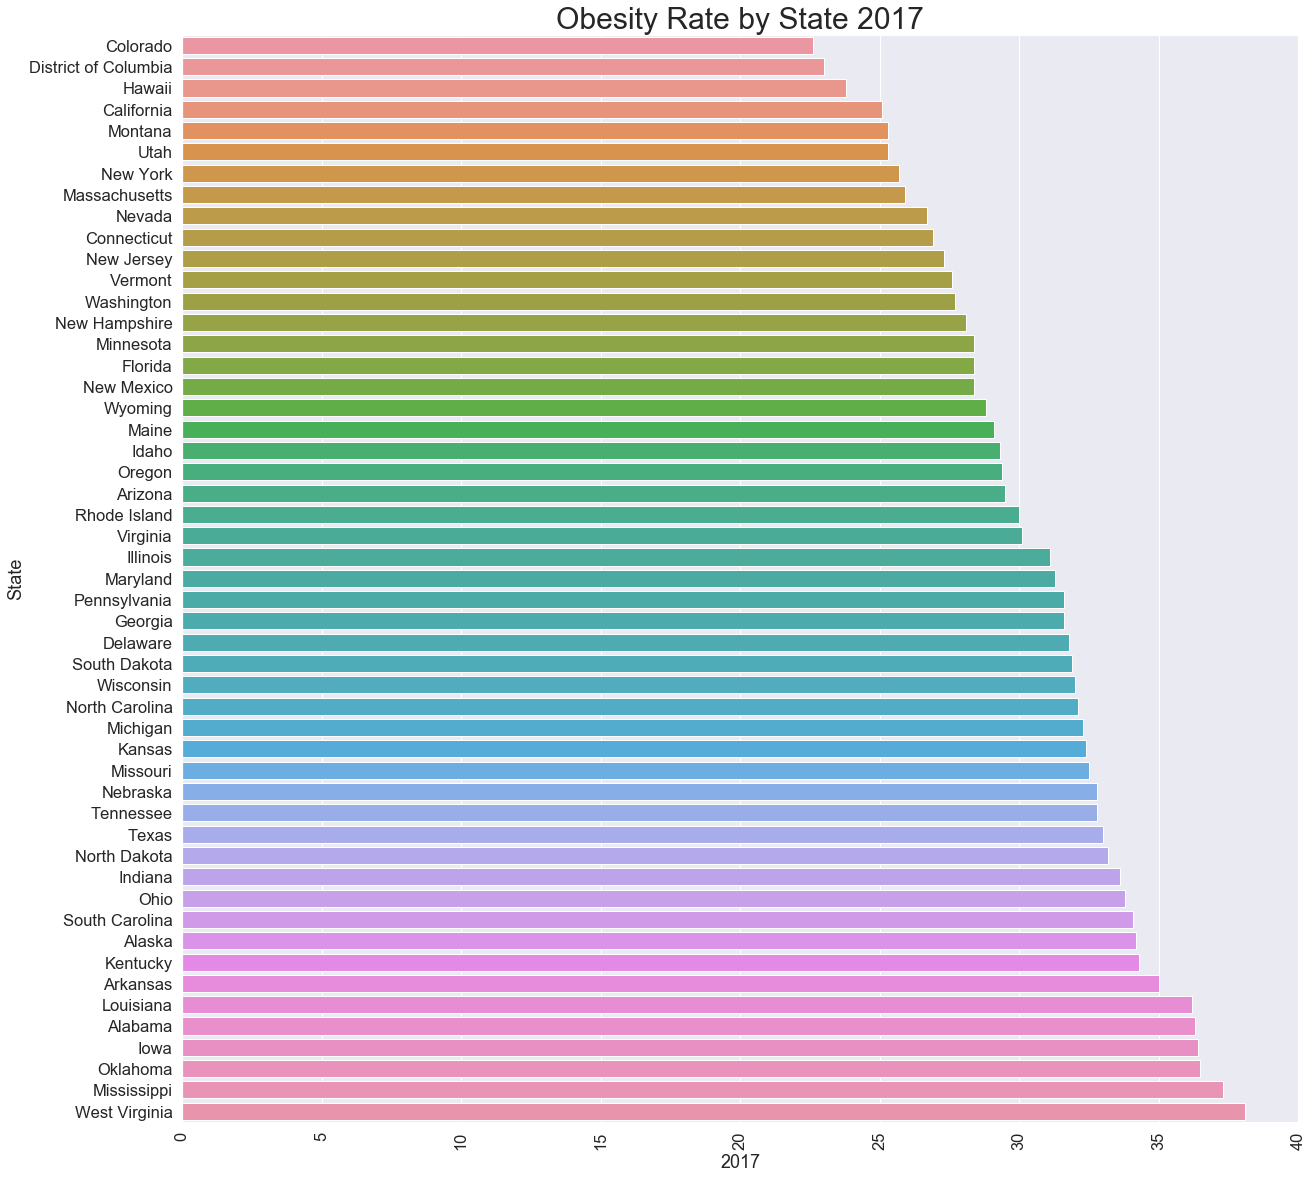

In [82]:
gec = (demographic_obesity_states[2017].sort_values(ascending = True)).index.values
demographic_obesity_states = demographic_obesity_states.reindex(gec)
plt.figure(figsize = (20,20))
ax = sns.barplot(x = demographic_obesity_states[2017], y = demographic_obesity_states.State)
plt.xticks(rotation = 90)
plt.title("Obesity Rate by State 2017", fontsize=30)
plt.show()


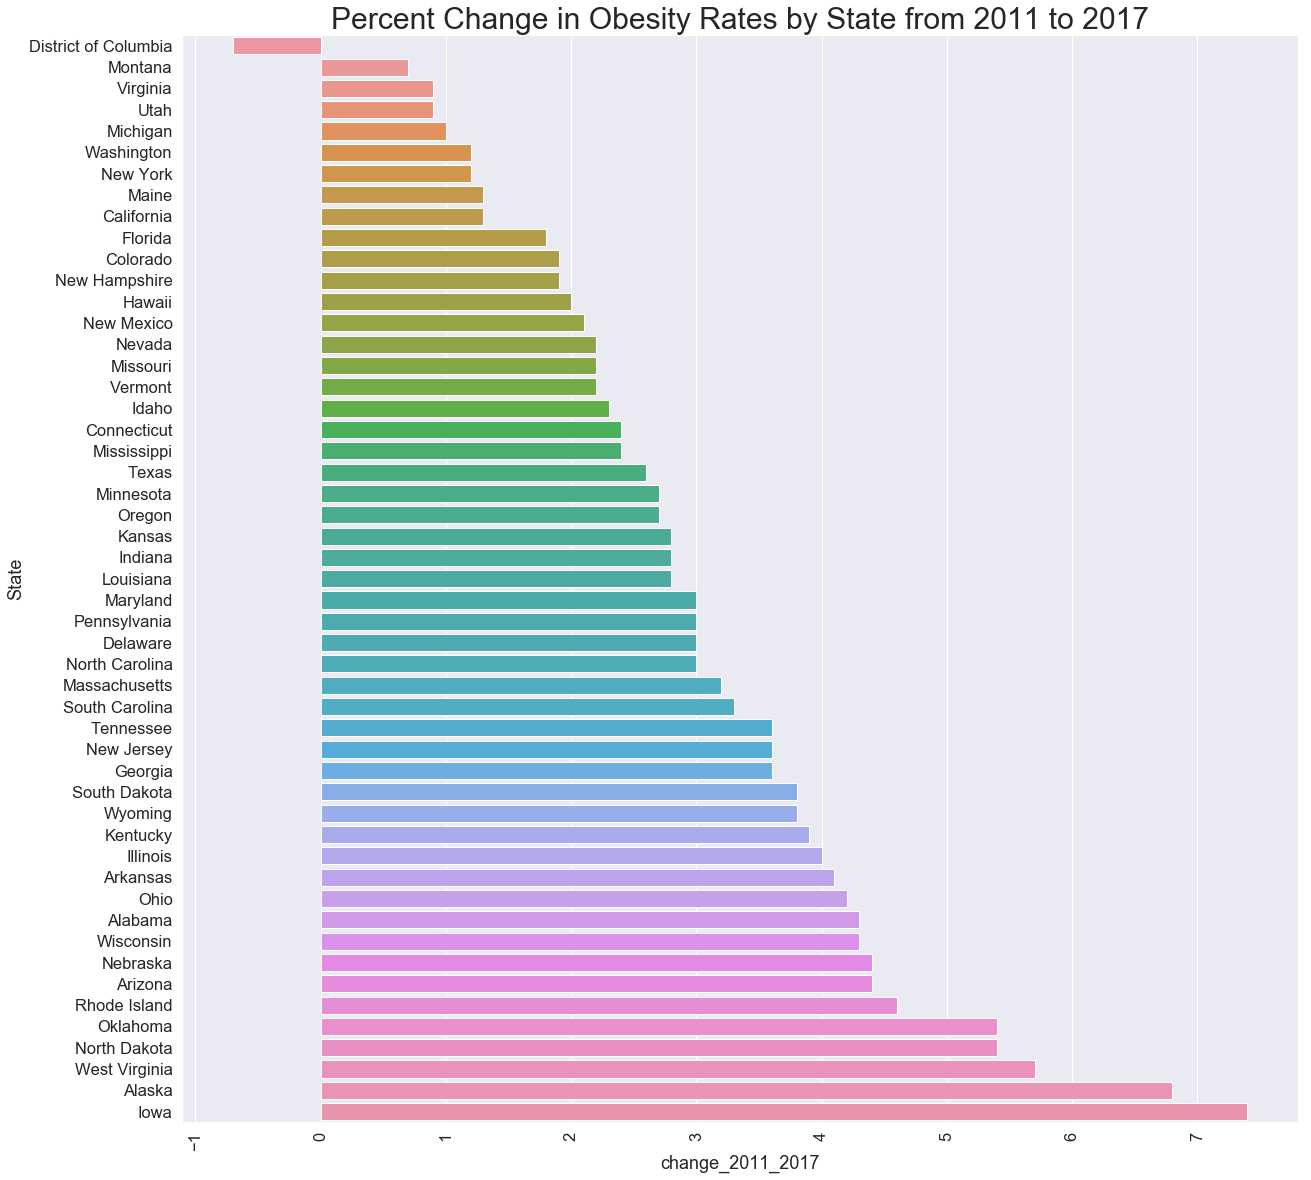

In [83]:
gec = (df_states["change_2011_2017"].sort_values(ascending = True)).index.values
df_states = df_states.reindex(gec)
plt.figure(figsize = (20,20))
ax = sns.barplot(x = df_states['change_2011_2017'], y = df_states.State)
plt.xticks(rotation = 90)
plt.title("Percent Change in Obesity Rates by State from 2011 to 2017", fontsize=30)
plt.show()


Text(0,0.5,'State')

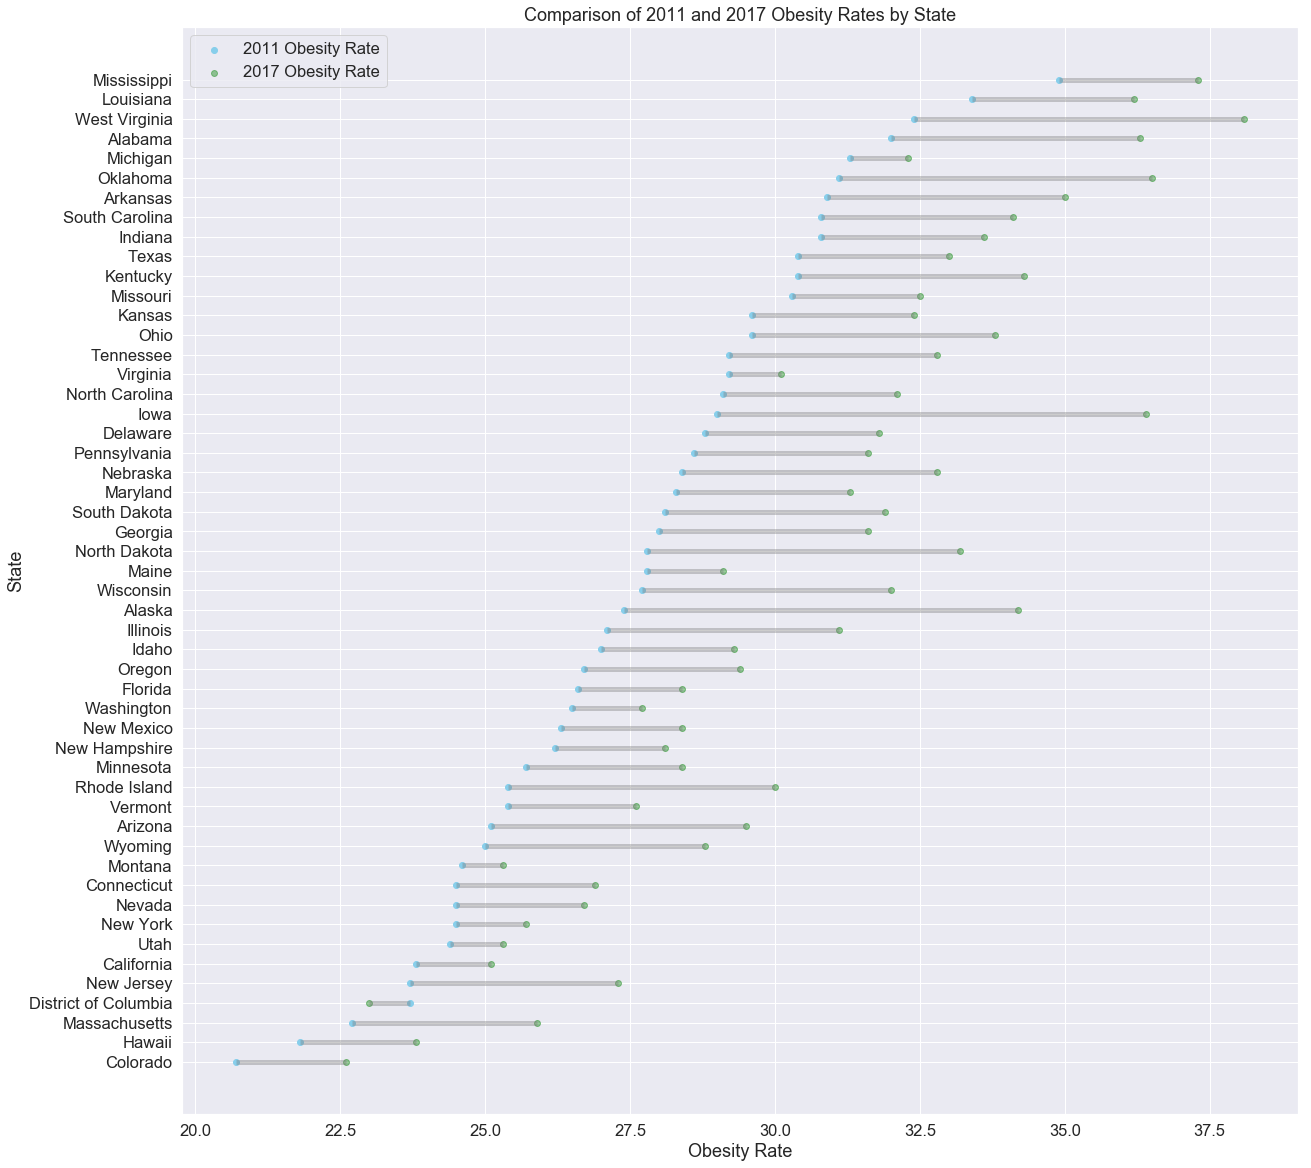

In [84]:
ordered_df = demographic_obesity_states.sort_values(by=2011)
my_range=range(1,len(demographic_obesity_states.index)+1)
plt.figure(figsize = (20,20))


plt.hlines(y=my_range, xmin=ordered_df[2011], xmax=ordered_df[2017], color='grey', alpha=0.4, linewidth=5.0)
plt.scatter(ordered_df[2011], my_range, color='skyblue', alpha=1, label='2011 Obesity Rate')
plt.scatter(ordered_df[2017], my_range, color='green', alpha=0.4 , label='2017 Obesity Rate')
plt.legend()

plt.yticks(my_range, ordered_df['State'])
plt.title("Comparison of 2011 and 2017 Obesity Rates by State", loc='center')
plt.xlabel('Obesity Rate')
plt.ylabel('State')


Text(0,0.5,'State')

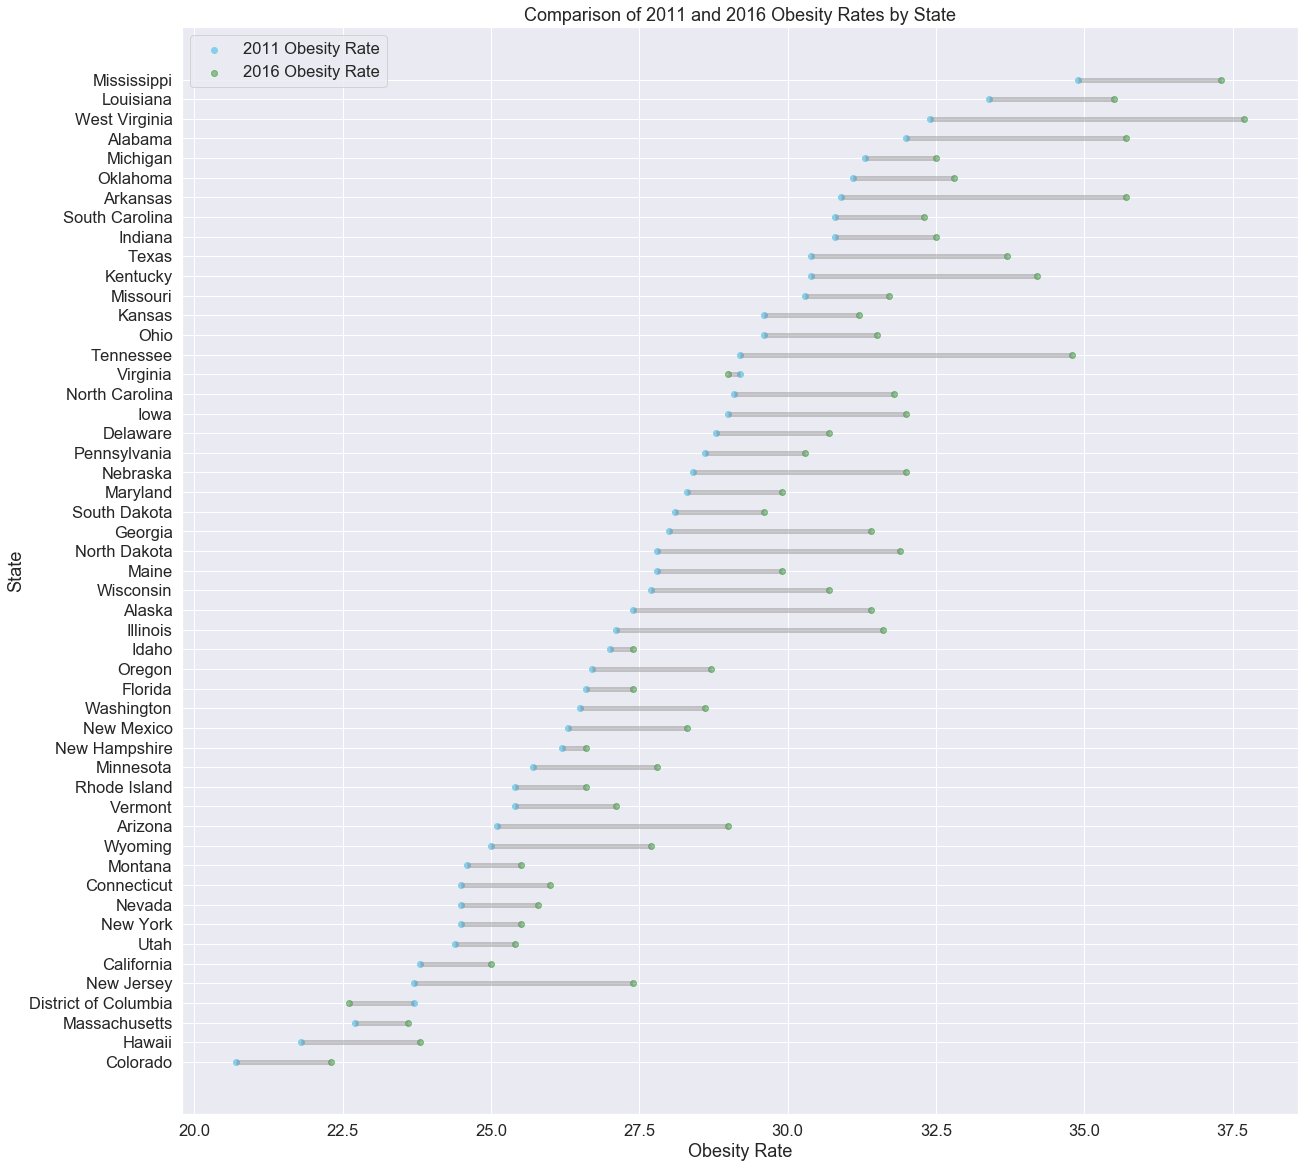

In [85]:
ordered_df = demographic_obesity_states.sort_values(by=2011)
my_range=range(1,len(demographic_obesity_states.index)+1)
plt.figure(figsize = (20,20))


plt.hlines(y=my_range, xmin=ordered_df[2011], xmax=ordered_df[2016], color='grey', alpha=0.4, linewidth=5.0)
plt.scatter(ordered_df[2011], my_range, color='skyblue', alpha=1, label='2011 Obesity Rate')
plt.scatter(ordered_df[2016], my_range, color='green', alpha=0.4 , label='2016 Obesity Rate')
plt.legend()

plt.yticks(my_range, ordered_df['State'])
plt.title("Comparison of 2011 and 2016 Obesity Rates by State", loc='center')
plt.xlabel('Obesity Rate')
plt.ylabel('State')


# plt.yticks(my_range, ordered_df['group'])
# plt.title("Comparison of the value 1 and the value 2", loc='left')
# plt.xlabel('Value of the variables')
# plt.ylabel('Group')

# ordered_df = df.sort_values(by='value1')
# my_range=range(1,len(df.index)+1)
# plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
# plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')
# plt.scatter(ordered_d

In [86]:
# Merge GeoLocation into state dataframe to visualize on a map.
list_GeoLocation=pd.unique(df_legislation['GeoLocation']).tolist()
list_State=pd.unique(df_legislation['LocationDesc']).tolist()

In [87]:
geo_df = pd.DataFrame(list(zip(list_State, list_GeoLocation)))
geo_df.columns = ['State', 'GeoLocation']
# geo_df.head()

In [88]:
demographic_obesity_states = pd.merge(demographic_obesity_states, geo_df, left_on='State', right_on = 'State', how='left')
# demographic_obesity_states.head()

In [89]:
df_states_machine_learning = df_states

In [90]:
data = [go.Choropleth(
    colorscale = 'Viridis',
    reversescale=True,
    autocolorscale = False,
    locations = demographic_obesity_states['Abbreviation'],
    z = demographic_obesity_states[2017].astype(float),
    locationmode = 'USA-states',
    marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
            color = 'rgb(255,255,255)',
            width = 2
        )),
    colorbar = go.choropleth.ColorBar(
        title = "Obesity Rate")
)]

layout = go.Layout(
    title = go.layout.Title(
        text = 'Obesity Rate by State in 2017'
    ),
    geo = go.layout.Geo(
        scope = 'usa',
        projection = go.layout.geo.Projection(type = 'albers usa'),
        showlakes = True,
        lakecolor = 'rgb(255, 255, 255)'),
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'd3-cloropleth-map', width=2000, height = 3000)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~ccarlevato/0 or inside your plot.ly account where it is named 'd3-cloropleth-map'


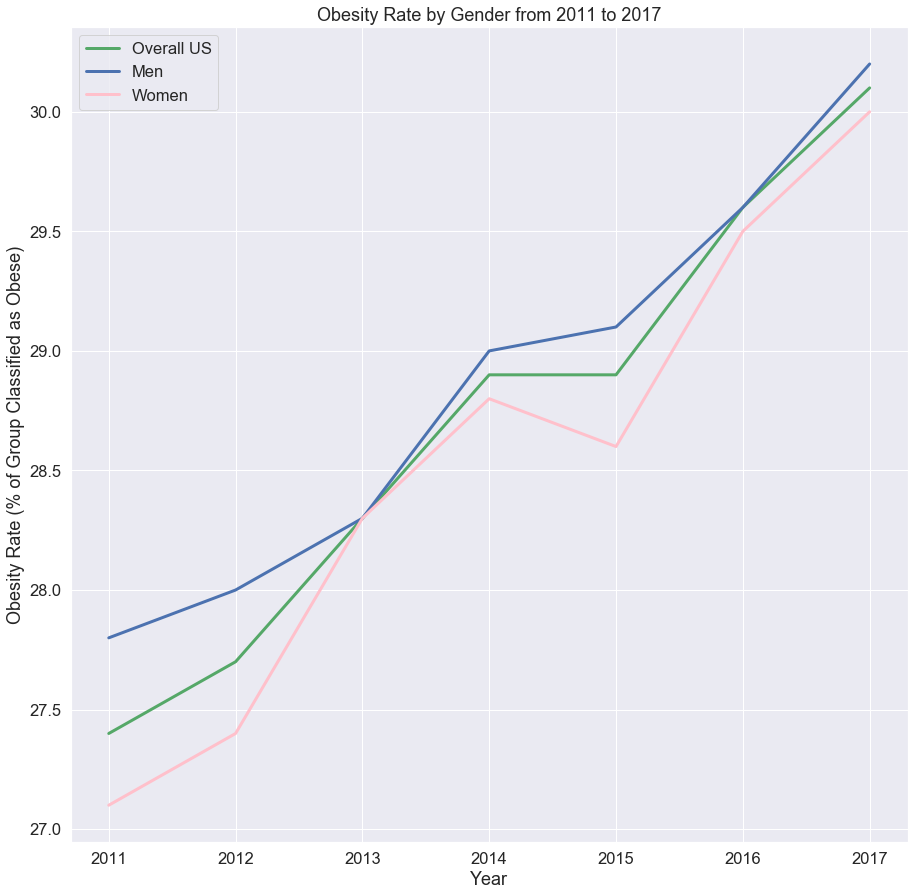

In [91]:
year = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017])
a = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', [2011, 2012, 2013, 2014, 2015, 2016, 2017]]
a = a.values.tolist()[0]

b = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['men_2011', 'men_2012', 'men_2013', 
                                                                  'men_2014', 'men_2015', 'men_2016', 'men_2017']]
b =  b.values.tolist()[0]

c = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['women_2011', 'women_2012', 'women_2013', 
                                                                  'women_2014', 'women_2015', 'women_2016', 'women_2017']]
c =  c.values.tolist()[0]

plt.figure(figsize = (15,15))
plt.plot(year, a, color = 'g', label = "Overall US", linewidth=3)
plt.plot(year, b, color = 'b', label = 'Men', linewidth=3)
plt.plot(year, c, color = 'Pink', label = 'Women', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Obesity Rate (% of Group Classified as Obese)')
plt.title('Obesity Rate by Gender from 2011 to 2017')
plt.legend()
plt.show()

In [92]:
demographic_columns = demographic_obesity.columns.tolist()

C:\Users\chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning:


Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike



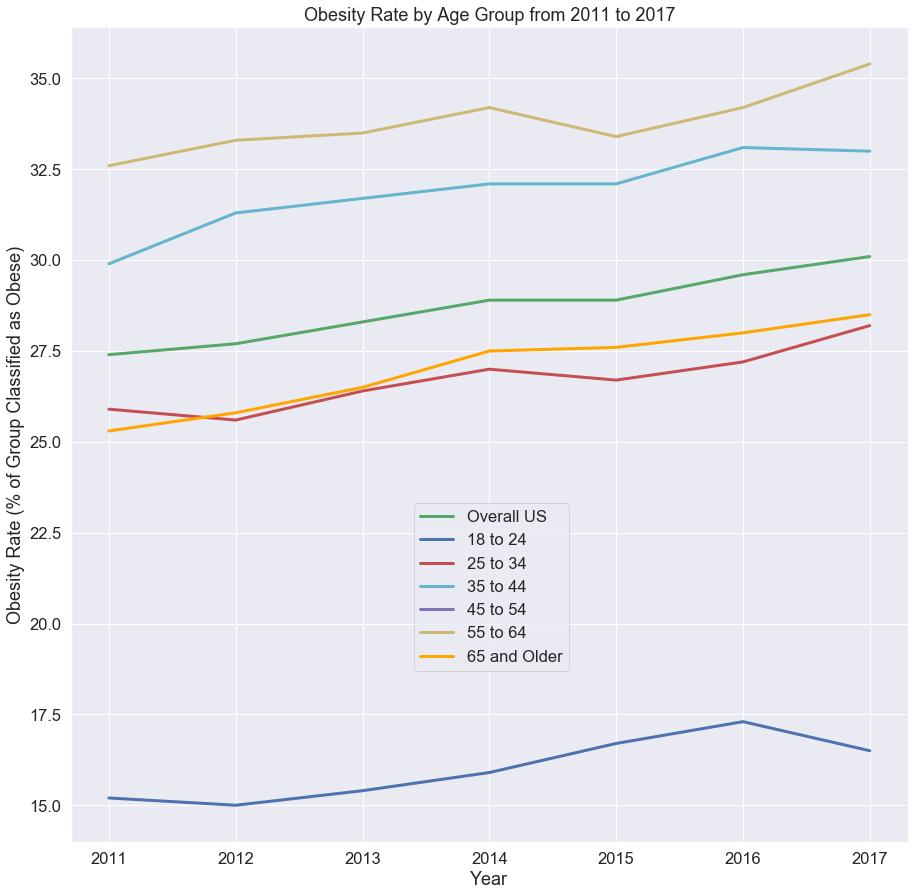

In [93]:
year = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017])
a = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', [2011, 2012, 2013, 2014, 2015, 2016, 2017]]
a = a.values.tolist()[0]

b = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['18_to_24_2011', '18_to_24_2012', '18_to_24_2013', 
                                                                  '18_to_24_2014', '18_to_24_2015', '18_to_24_2016', '18_to_24_2017']]
b =  b.values.tolist()[0]

c = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['25_to_34_2011', '25_to_34_2012', '25_to_34_2013', 
                                                                  '25_to_34_2014', '25_to_34_2015', '25_to_34_2016', '25_to_34_2017']]
c =  c.values.tolist()[0]

d = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['35_to_44_2011', '35_to_44_2012', '35_to_44_2013', 
                                                                  '35_to_44_2014', '35_to_44_2015', '35_to_44_2016', '35_to_44_2017']]
d =  d.values.tolist()[0]

e = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['45_to_54_2011', '45_to_54__2012', '45_to_54__2013', 
                                                                  '45_to_54__2014', '45_to_54__2015', '45_to_54__2016', '45_to_54__2017']]
e =  e.values.tolist()[0]

f = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['55_to_64_2011', '55_to_64_2012', '55_to_64_2013', 
                                                                  '55_to_64_2014', '55_to_64_2015', '55_to_64_2016', '55_to_64_2017']]
f =  f.values.tolist()[0]

g = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['65_2011', '65_2012', '65_2013', 
                                                                  '65_2014', '65_2015', '65_2016', '65_2017']]
g =  g.values.tolist()[0]


plt.figure(figsize = (15,15))
plt.plot(year, a, color = 'g', label = "Overall US", linewidth=3)
plt.plot(year, b, color = 'b', label = '18 to 24', linewidth=3)
plt.plot(year, c, color = 'r', label = '25 to 34', linewidth=3)
plt.plot(year, d, color = 'c', label = '35 to 44', linewidth=3)
plt.plot(year, e, color = 'm', label = '45 to 54', linewidth=3)
plt.plot(year, f, color = 'y', label = '55 to 64', linewidth=3)
plt.plot(year, g, color = 'orange', label = '65 and Older', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Obesity Rate (% of Group Classified as Obese)')
plt.title('Obesity Rate by Age Group from 2011 to 2017')
plt.legend(bbox_to_anchor = [0.4, 0.2])
plt.show()

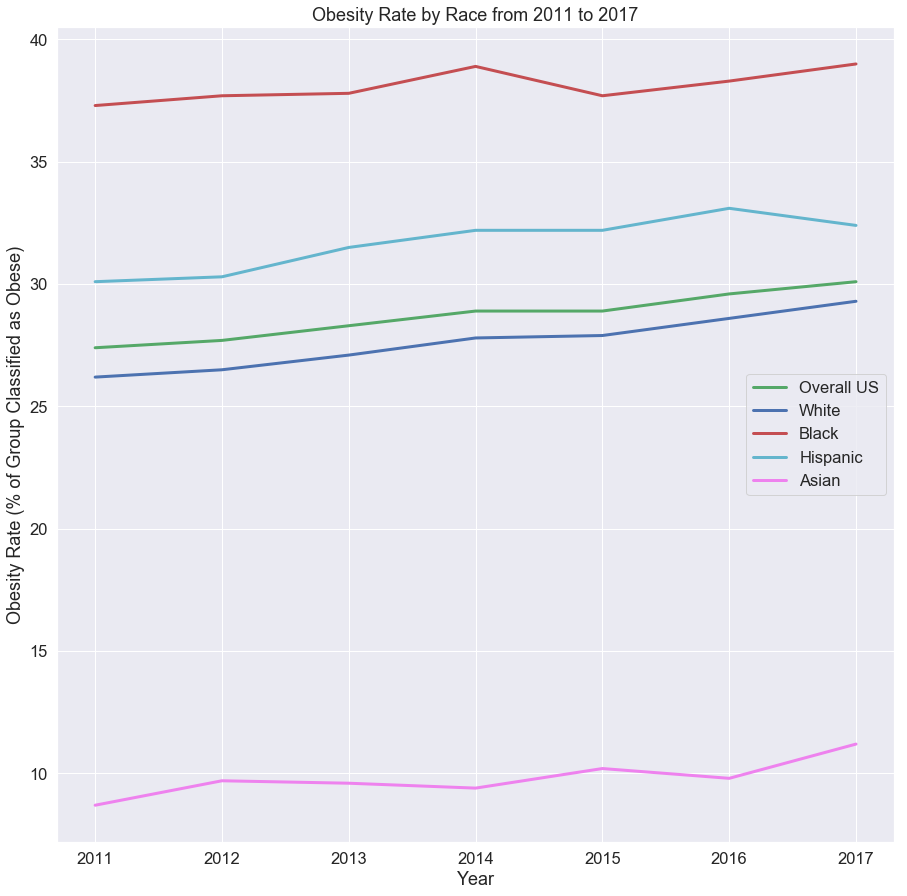

In [94]:
year = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017])
a = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', [2011, 2012, 2013, 2014, 2015, 2016, 2017]]
a = a.values.tolist()[0]

b = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['white_2011', 'white_2012', 
                                                                       'white_2013', 'white_2014', 
                                                                       'white_2015', 'white_2016', 
                                                                       'white_2017']]
b =  b.values.tolist()[0]

c = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['black_2011', 'black_2012', 
                                                                       'black_2013', 'black_2014', 
                                                                       'black_2015', 'black_2016', 
                                                                       'black_2017']]
c =  c.values.tolist()[0]


d = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['hispanic_2011', 'hispanic_2012', 
                                                                       'hispanic_2013', 'hispanic_2014', 
                                                                       'hispanic_2015', 'hispanic_2016', 
                                                                       'hispanic_2017']]
d =  d.values.tolist()[0]

e = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['asian_2011', 'asian_2012', 
                                                                       'asian_2013', 'asian_2014', 
                                                                       'asian_2015', 'asian_2016', 
                                                                       'asian_2017']]
e =  e.values.tolist()[0]



plt.figure(figsize = (15,15))
plt.plot(year, a, color = 'g', label = "Overall US", linewidth=3)
plt.plot(year, b, color = 'b', label = 'White', linewidth=3)
plt.plot(year, c, color = 'r', label = 'Black', linewidth=3)
plt.plot(year, d, color = 'c', label = 'Hispanic', linewidth=3)
plt.plot(year, e, color = 'violet', label = 'Asian', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Obesity Rate (% of Group Classified as Obese)')
plt.title('Obesity Rate by Race from 2011 to 2017')
plt.legend()

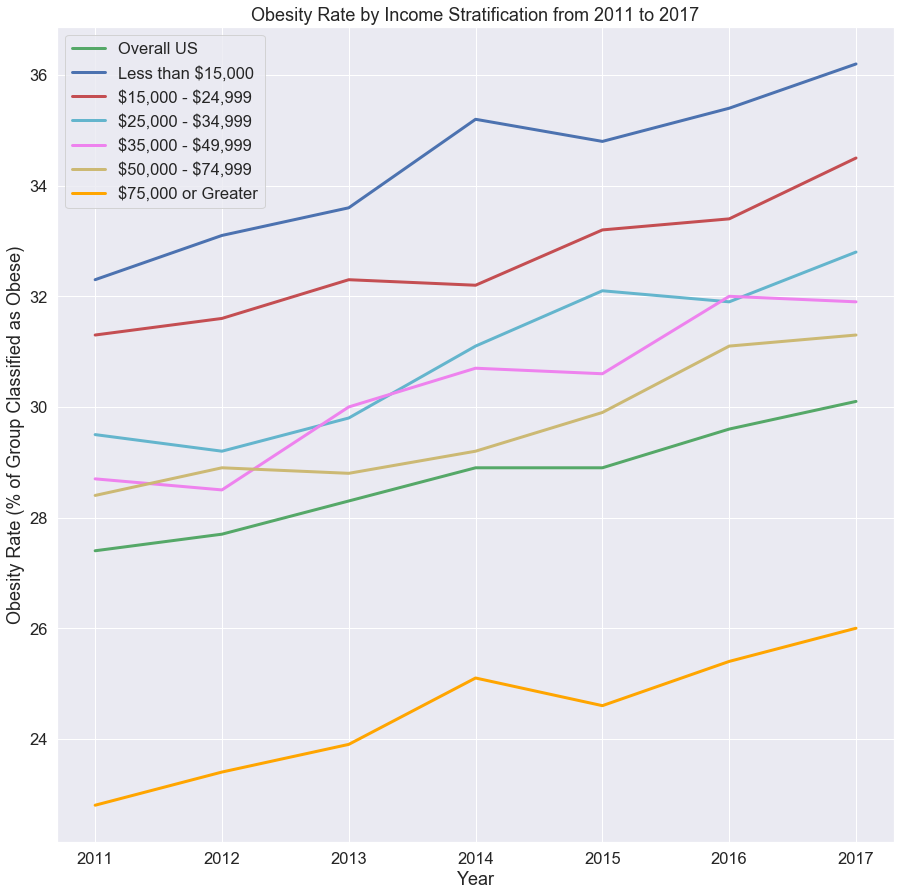

In [95]:
year = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017])
a = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', [2011, 2012, 2013, 2014, 2015, 2016, 2017]]
a = a.values.tolist()[0]

b = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['lessthan_15000_2011', 'lessthan_15000_2012', 
                                                                       'lessthan_15000_2013', 'lessthan_15000_2014', 
                                                                       'lessthan_15000_2015', 'lessthan_15000_2016', 
                                                                       'lessthan_15000_2017']]
b =  b.values.tolist()[0]

c = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['lessthan_25000_2011', 'lessthan_25000_2012', 
                                                                       'lessthan_25000_2013', 'lessthan_25000_2014', 
                                                                       'lessthan_25000_2015', 'lessthan_25000_2016', 
                                                                       'lessthan_25000_2017']]
c =  c.values.tolist()[0]

d = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['lessthan_35000_2011', 'lessthan_35000_2012', 
                                                                       'lessthan_35000_2013', 'lessthan_35000_2014', 
                                                                       'lessthan_35000_2015', 'lessthan_35000_2016', 
                                                                       'lessthan_35000_2017']]
d =  d.values.tolist()[0]

e = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['lessthan_50000_2011', 'lessthan_50000_2012', 
                                                                       'lessthan_50000_2013', 'lessthan_50000_2014', 
                                                                       'lessthan_50000_2015', 'lessthan_50000_2016', 
                                                                       'lessthan_50000_2017']]
e =  e.values.tolist()[0]

f = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['lessthan_75000_2011', 'lessthan_75000_2012', 
                                                                       'lessthan_75000_2013', 'lessthan_75000_2014', 
                                                                       'lessthan_75000_2015', 'lessthan_75000_2016', 
                                                                       'lessthan_75000_2017']]
f =  f.values.tolist()[0]

g = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['greaterthan_75000_2011', 'greaterthan_75000_2012', 
                                                                       'greaterthan_75000_2013', 'greaterthan_75000_2014', 
                                                                       'greaterthan_75000_2015', 'greaterthan_75000_2016', 
                                                                       'greaterthan_75000_2017']]
g =  g.values.tolist()[0]


plt.figure(figsize = (15,15))
plt.plot(year, a, color = 'g', label = "Overall US", linewidth=3)
plt.plot(year, b, color = 'b', label = 'Less than \$15,000', linewidth=3)
plt.plot(year, c, color = 'r', label = '\$15,000 - \$24,999', linewidth=3)
plt.plot(year, d, color = 'c', label = '\$25,000 - \$34,999', linewidth=3)
plt.plot(year, e, color = 'violet', label = '\$35,000 - \$49,999', linewidth=3)
plt.plot(year, f, color = 'y', label = '\$50,000 - \$74,999', linewidth=3)
plt.plot(year, g, color = 'orange', label = '\$75,000 or Greater', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Obesity Rate (% of Group Classified as Obese)')
plt.title('Obesity Rate by Income Stratification from 2011 to 2017')
plt.legend()

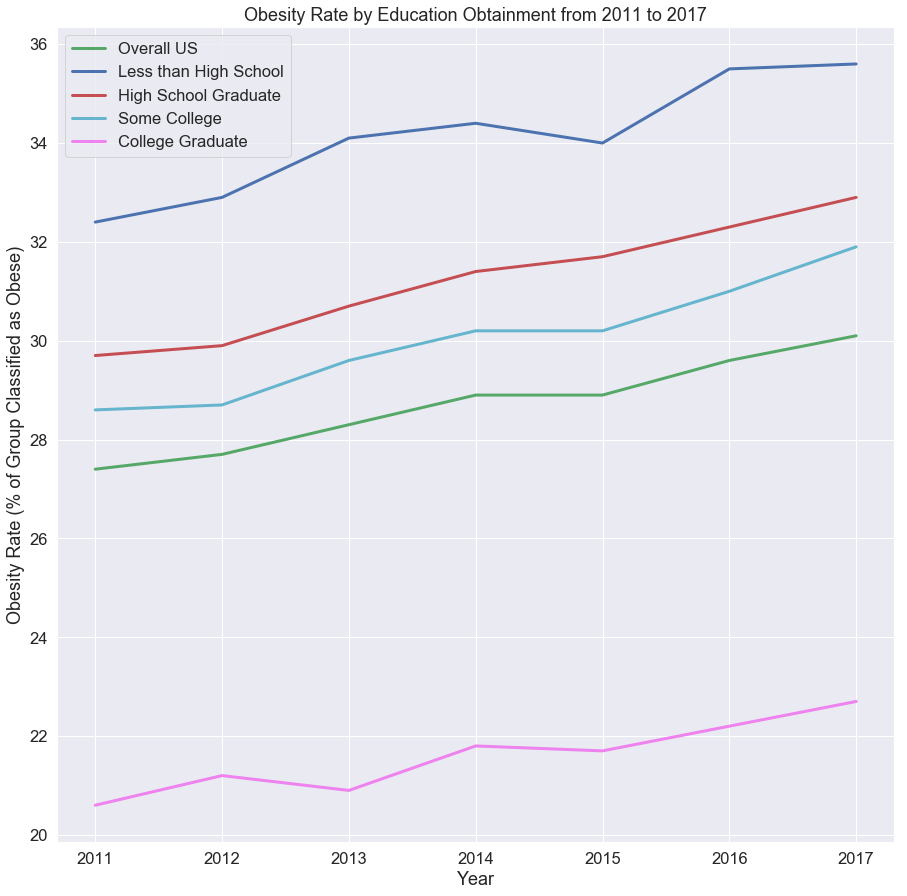

In [96]:
year = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017])
a = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', [2011, 2012, 2013, 2014, 2015, 2016, 2017]]
a = a.values.tolist()[0]

b = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['lessthan_highschool_2011', 'lessthan_highschool_2012', 
                                                                       'lessthan_highschool_2013', 'lessthan_highschool_2014', 
                                                                       'lessthan_highschool_2015', 'lessthan_highschool_2016', 
                                                                       'lessthan_highschool_2017']]
b =  b.values.tolist()[0]

c = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['highschool_2011', 'highschool_2012', 
                                                                       'highschool_2013', 'highschool_2014', 
                                                                       'highschool_2015', 'highschool_2016', 
                                                                       'highschool_2017']]
c =  c.values.tolist()[0]

d = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['somecollege_2011', 'somecollege_2012', 
                                                                       'somecollege_2013', 'somecollege_2014', 
                                                                       'somecollege_2015', 'somecollege_2016', 
                                                                       'somecollege_2017']]
d =  d.values.tolist()[0]

e = demographic_obesity.loc[demographic_obesity.LocationAbbr == 'US', ['college_2011', 'college_2012', 
                                                                       'college_2013', 'college_2014', 
                                                                       'college_2015', 'college_2016', 
                                                                       'college_2017']]
e =  e.values.tolist()[0]


plt.figure(figsize = (15,15))
plt.plot(year, a, color = 'g', label = "Overall US", linewidth=3)
plt.plot(year, b, color = 'b', label = 'Less than High School', linewidth=3)
plt.plot(year, c, color = 'r', label = 'High School Graduate', linewidth=3)
plt.plot(year, d, color = 'c', label = 'Some College', linewidth=3)
plt.plot(year, e, color = 'violet', label = 'College Graduate', linewidth=3)
plt.xlabel('Year')
plt.ylabel('Obesity Rate (% of Group Classified as Obese)')
plt.title('Obesity Rate by Education Obtainment from 2011 to 2017')
plt.legend()
plt.show()

In [97]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [98]:
# Create widgets
directory = widgets.Dropdown(options=['Line Plots', 'Lollipop plots', 'Choropleths', 'Bar Charts'])
images = widgets.Dropdown(options=os.listdir(directory.value))

# Updates the image options based on directory value
def update_images(*args):
    images.options = os.listdir(directory.value)

# Tie the image options to directory value
directory.observe(update_images, 'value')

# Show the images
def show_images(fdir, file):
    display(Image(f'{fdir}/{file}'))

_ = interact(show_images, fdir=directory, file=images)

interactive(children=(Dropdown(description='fdir', options=('Line Plots', 'Lollipop plots', 'Choropleths', 'Ba…

In [99]:
import geopandas as gpd
import fiona
from shapely.geometry import Point, Polygon
import shapefile as shp
gdf = gpd.read_file('./Data/tl_2018_us_state.shp')
# print (gdf)

In [100]:
gdf = pd.merge(gdf, demographic_obesity_states , left_on='STUSPS', right_on = 'Abbreviation', how='right')

In [101]:
gdf = gdf.drop(['REGION', 'DIVISION', 'STATEFP', 'STATENS', 'STUSPS', 'NAME', 'LSAD', 'MTFCC', 'FUNCSTAT','ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON'], axis=1)

In [ ]:
# gdf = gdf.drop(['GEOID_x', 'geometry_x', 'GEOID_y', 'geometry_y'], axis=1)

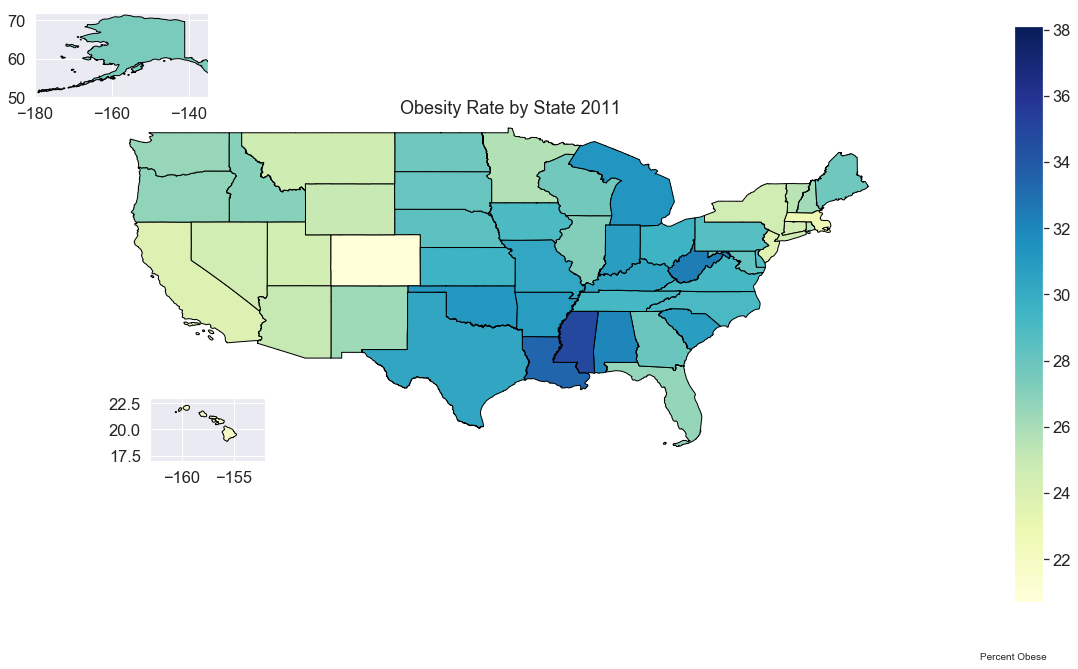

In [103]:
vmin = gdf[2011].min()
vmax = gdf[2017].max()
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
gdf.plot(column = 2011, ax = ax, cmap='YlGnBu', legend = False, vmin=vmin, vmax=vmax, edgecolor = 'black')
ax.set_xlim([-130, -60])
ax.set_ylim([20,50])
plt.title('Obesity Rate by State 2011')


ak = plt.axes([.1, .65, .15, .15])
gdf.plot(column = 2011, ax = ak, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
ak.set_xlim([-180, -135])
ak.set_ylim([50,72])
#plt.axis('off') #When I try to remove the axes, it goes crazy, so I'll just leave them there

hi = plt.axes([.2, .35, .1, .1])
gdf.plot(column = 2011, ax = hi, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
hi.set_xlim([-163, -152])
hi.set_ylim([17,23])
ax.axis('off')


cax = fig.add_axes([0.95, 0.25, 0.025, 0.5]) #[left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);
fig.text(.92,.2,'Percent Obese'); 
fig.savefig('choropleth2011.jpg', dpi=300)

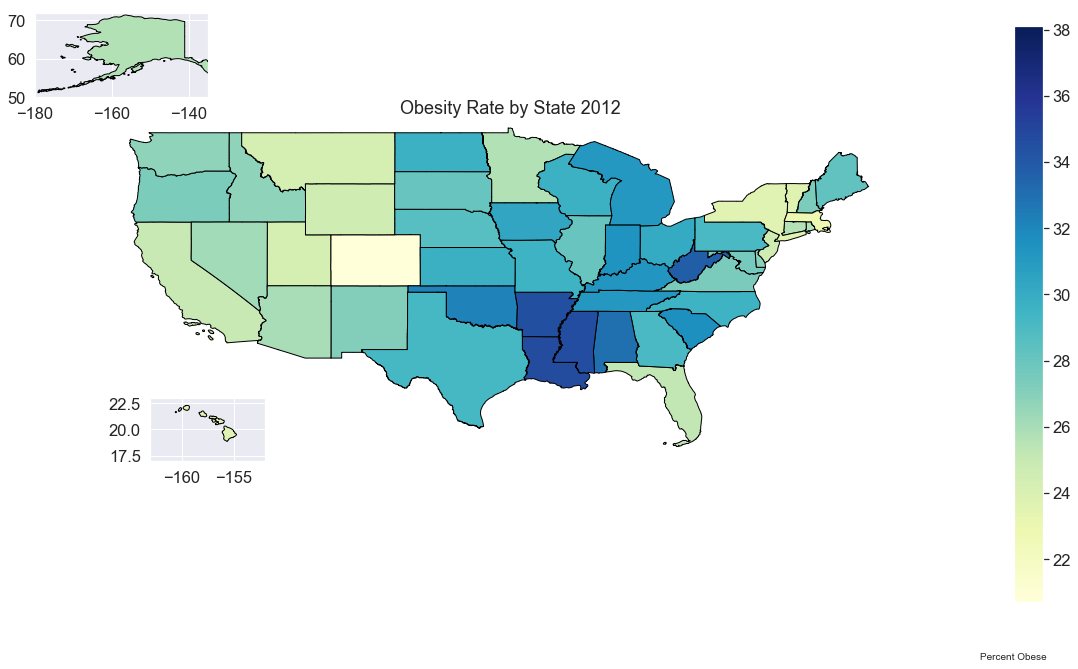

In [104]:
vmin = gdf[2011].min()
vmax = gdf[2017].max()
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
gdf.plot(column = 2012, ax = ax, cmap='YlGnBu', legend = False, vmin=vmin, vmax=vmax, edgecolor = 'black')
ax.set_xlim([-130, -60])
ax.set_ylim([20,50])
plt.title('Obesity Rate by State 2012')


ak = plt.axes([.1, .65, .15, .15])
gdf.plot(column = 2012, ax = ak, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
ak.set_xlim([-180, -135])
ak.set_ylim([50,72])
#plt.axis('off') #When I try to remove the axes, it goes crazy, so I'll just leave them there

hi = plt.axes([.2, .35, .1, .1])
gdf.plot(column = 2012, ax = hi, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
hi.set_xlim([-163, -152])
hi.set_ylim([17,23])
ax.axis('off')


cax = fig.add_axes([0.95, 0.25, 0.025, 0.5]) #[left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);
fig.text(.92,.2,'Percent Obese'); 
fig.savefig('choropleth2012.jpg', dpi=300)

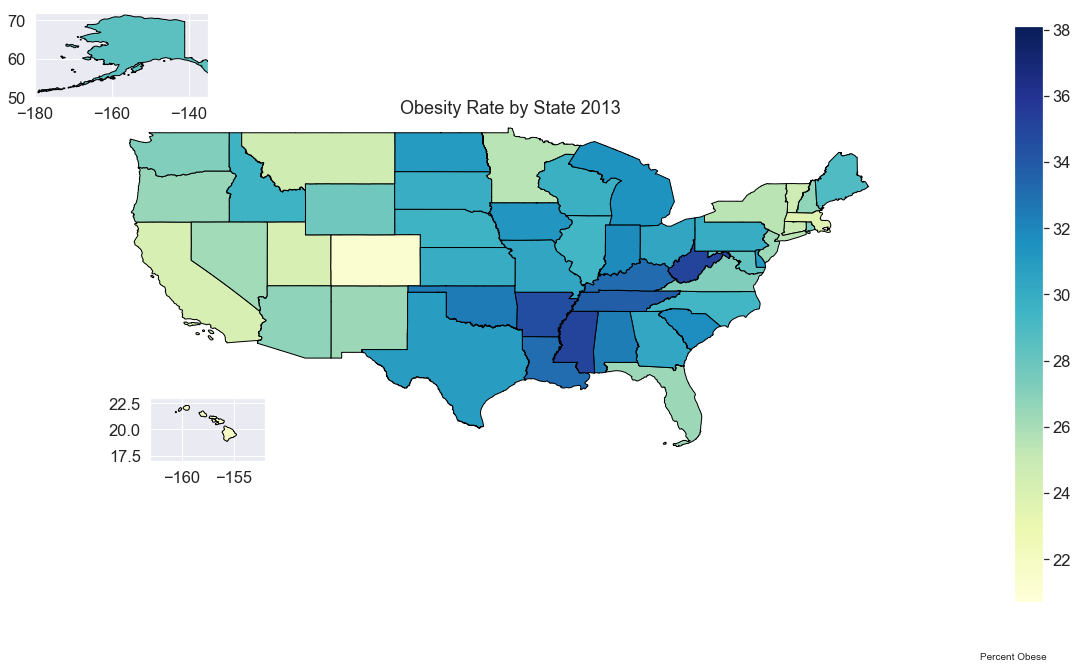

In [105]:
vmin = gdf[2011].min()
vmax = gdf[2017].max()
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
gdf.plot(column = 2013, ax = ax, cmap='YlGnBu', legend = False, vmin=vmin, vmax=vmax, edgecolor = 'black')
ax.set_xlim([-130, -60])
ax.set_ylim([20,50])
plt.title('Obesity Rate by State 2013')


ak = plt.axes([.1, .65, .15, .15])
gdf.plot(column = 2013, ax = ak, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
ak.set_xlim([-180, -135])
ak.set_ylim([50,72])
#plt.axis('off') #When I try to remove the axes, it goes crazy, so I'll just leave them there

hi = plt.axes([.2, .35, .1, .1])
gdf.plot(column = 2013, ax = hi, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
hi.set_xlim([-163, -152])
hi.set_ylim([17,23])
ax.axis('off')


cax = fig.add_axes([0.95, 0.25, 0.025, 0.5]) #[left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);
fig.text(.92,.2,'Percent Obese'); 
fig.savefig('choropleth2013.jpg', dpi=300)

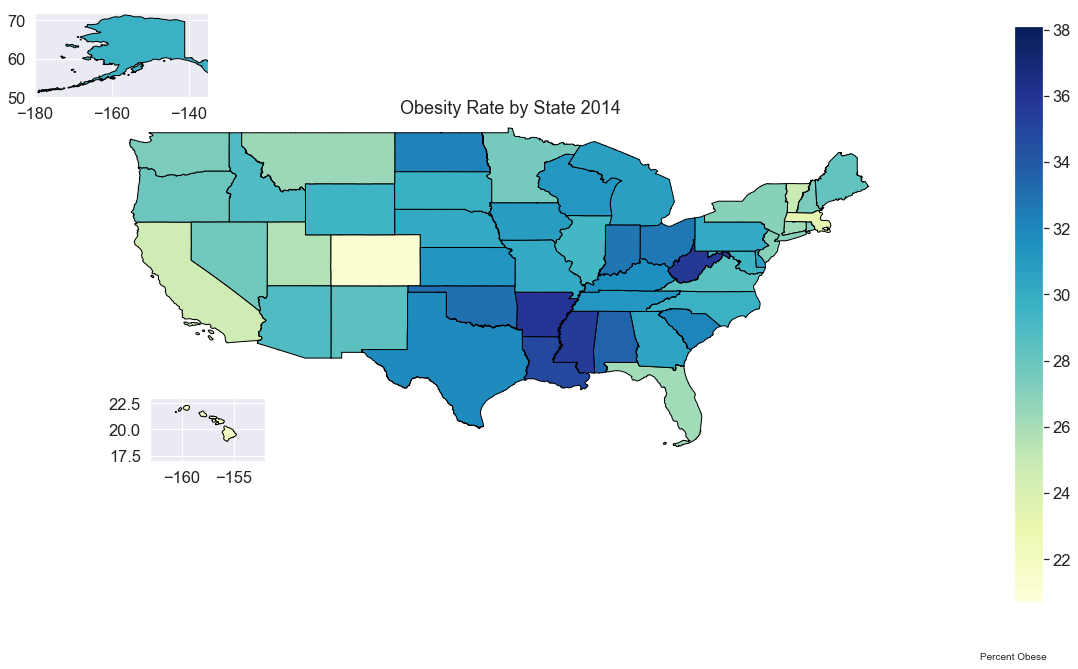

In [106]:
vmin = gdf[2011].min()
vmax = gdf[2017].max()
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
gdf.plot(column = 2014, ax = ax, cmap='YlGnBu', legend = False, vmin=vmin, vmax=vmax, edgecolor = 'black')
ax.set_xlim([-130, -60])
ax.set_ylim([20,50])
plt.title('Obesity Rate by State 2014')


ak = plt.axes([.1, .65, .15, .15])
gdf.plot(column = 2014, ax = ak, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
ak.set_xlim([-180, -135])
ak.set_ylim([50,72])
#plt.axis('off') #When I try to remove the axes, it goes crazy, so I'll just leave them there

hi = plt.axes([.2, .35, .1, .1])
gdf.plot(column = 2014, ax = hi, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
hi.set_xlim([-163, -152])
hi.set_ylim([17,23])
ax.axis('off')


cax = fig.add_axes([0.95, 0.25, 0.025, 0.5]) #[left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);
fig.text(.92,.2,'Percent Obese'); 
fig.savefig('choropleth2014.jpg', dpi=300)

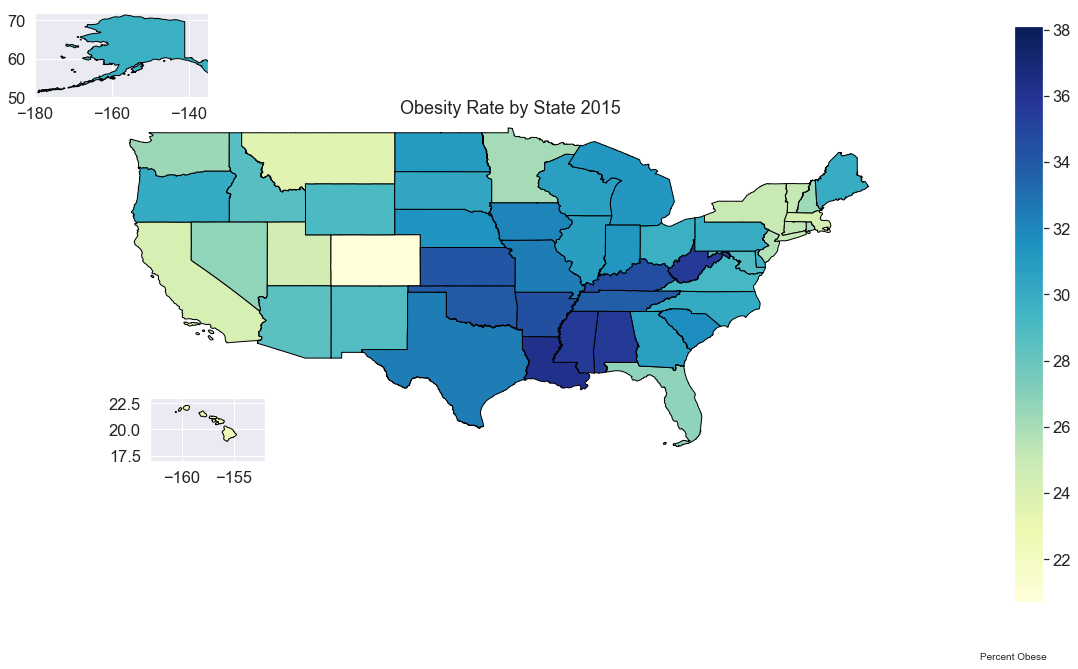

In [107]:
vmin = gdf[2011].min()
vmax = gdf[2017].max()
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
gdf.plot(column = 2015, ax = ax, cmap='YlGnBu', legend = False, vmin=vmin, vmax=vmax, edgecolor = 'black')
ax.set_xlim([-130, -60])
ax.set_ylim([20,50])
plt.title('Obesity Rate by State 2015')


ak = plt.axes([.1, .65, .15, .15])
gdf.plot(column = 2015, ax = ak, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
ak.set_xlim([-180, -135])
ak.set_ylim([50,72])
#plt.axis('off') #When I try to remove the axes, it goes crazy, so I'll just leave them there

hi = plt.axes([.2, .35, .1, .1])
gdf.plot(column = 2015, ax = hi, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
hi.set_xlim([-163, -152])
hi.set_ylim([17,23])
ax.axis('off')


cax = fig.add_axes([0.95, 0.25, 0.025, 0.5]) #[left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);
fig.text(.92,.2,'Percent Obese'); 
fig.savefig('choropleth2015.jpg', dpi=300)

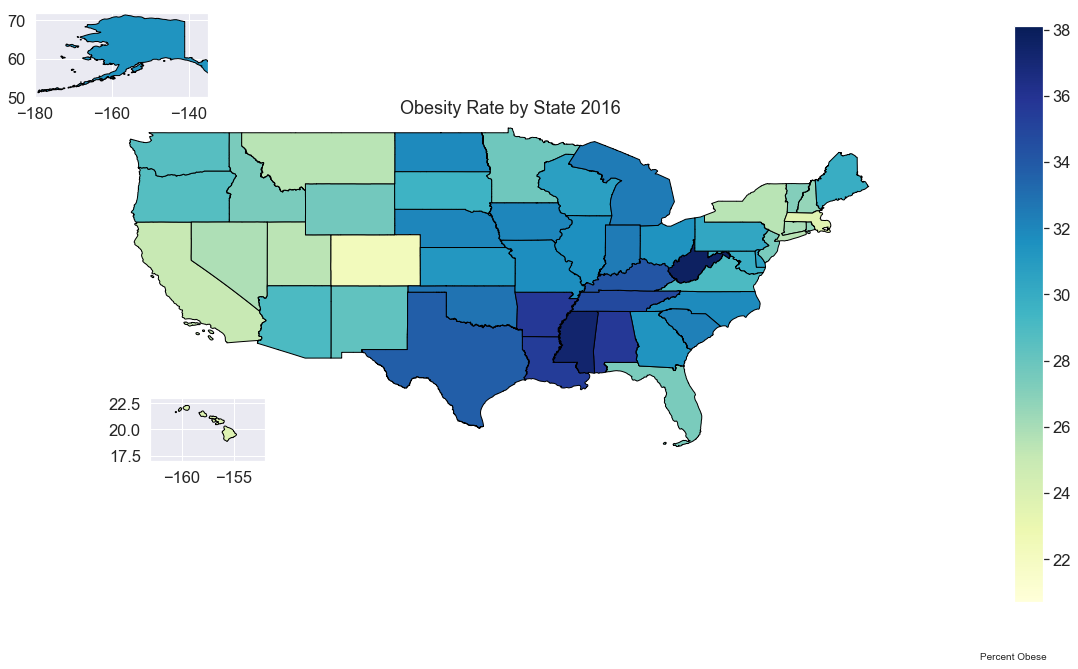

In [108]:
vmin = gdf[2011].min()
vmax = gdf[2017].max()
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
gdf.plot(column = 2016, ax = ax, cmap='YlGnBu', legend = False, vmin=vmin, vmax=vmax, edgecolor = 'black')
ax.set_xlim([-130, -60])
ax.set_ylim([20,50])
plt.title('Obesity Rate by State 2016')


ak = plt.axes([.1, .65, .15, .15])
gdf.plot(column = 2016, ax = ak, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
ak.set_xlim([-180, -135])
ak.set_ylim([50,72])
#plt.axis('off') #When I try to remove the axes, it goes crazy, so I'll just leave them there

hi = plt.axes([.2, .35, .1, .1])
gdf.plot(column = 2016, ax = hi, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
hi.set_xlim([-163, -152])
hi.set_ylim([17,23])
ax.axis('off')


cax = fig.add_axes([0.95, 0.25, 0.025, 0.5]) #[left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);
fig.text(.92,.2,'Percent Obese'); 
fig.savefig('choropleth2016.jpg', dpi=300)

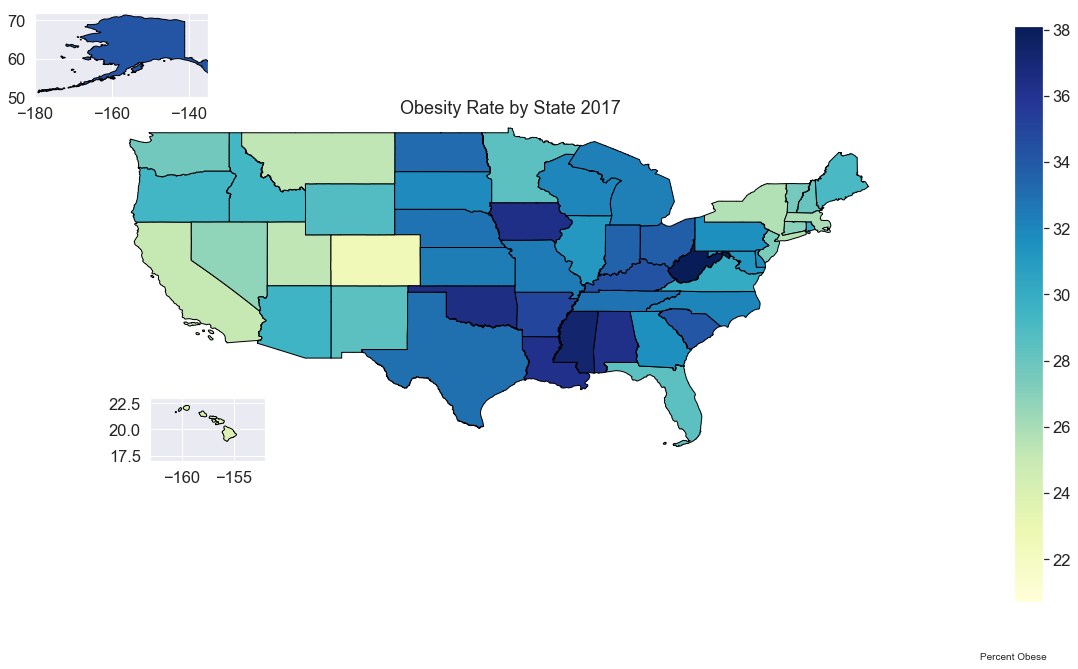

In [109]:
vmin = gdf[2011].min()
vmax = gdf[2017].max()
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
gdf.plot(column = 2017, ax = ax, cmap='YlGnBu', legend = False, vmin=vmin, vmax=vmax, edgecolor = 'black')
ax.set_xlim([-130, -60])
ax.set_ylim([20,50])
plt.title('Obesity Rate by State 2017')


ak = plt.axes([.1, .65, .15, .15])
gdf.plot(column = 2017, ax = ak, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
ak.set_xlim([-180, -135])
ak.set_ylim([50,72])
#plt.axis('off') #When I try to remove the axes, it goes crazy, so I'll just leave them there

hi = plt.axes([.2, .35, .1, .1])
gdf.plot(column = 2017, ax = hi, cmap='YlGnBu', legend = False,vmin=vmin, vmax=vmax, edgecolor = 'black')
hi.set_xlim([-163, -152])
hi.set_ylim([17,23])
ax.axis('off')


cax = fig.add_axes([0.95, 0.25, 0.025, 0.5]) #[left, bottom, width, height]
sm = plt.cm.ScalarMappable(cmap='YlGnBu', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
fig.colorbar(sm, cax=cax);
fig.text(.92,.2,'Percent Obese'); 
fig.savefig('choropleth2017.jpg', dpi=300)

In [110]:
import plotly.tools as tls
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [111]:
df_states = df_states.rename(columns = {'Breastfeeding_x': 'Breastfeeding Binary'})

In [112]:
df_states = df_states.rename(columns = {'Breastfeeding_y': 'Breastfeeding'})
df_states = df_states.rename(columns = {'Nutrition Standards_x': 'Nutrition Standards Binary'})
df_states = df_states.rename(columns = {'Nutrition Standards_y': 'Nutrition Standards'})


In [113]:
df_states = df_states.drop('LocationAbbr_x', axis=1)
df_states = df_states.drop('LocationAbbr_y', axis=1)

In [114]:
df_states = df_states.rename(columns = {'change_2011_2017': 'Change in Obesity from 2011 to 2017'})

In [115]:
legislation_description_df = pd.read_csv('./Data/Legislation Description.csv')

In [116]:
@interact
def correlation_obesity(x=list(df_states.select_dtypes('number').columns)
[29:81], 
                 y=list(df_states.select_dtypes('number').columns)
[81]                 
                 ):
    print(f"Correlation between : {df_states[x].corr(df_states[y])}")
    if x == 'Freq of Enacted Legislation':
        print('Description: Total number of enacted state pieces of legislation to promote healthy living'
        +' from all 50 US states and DC from 2001 to 2017. Data include information'
        +' related to state legislation and regulations on nutrition, physical activity'
        +' and obesity in settings such as early care and education centers, restaurants'
        +' schools, work places, and others.')
    if x == 'Access to Drinking Water':
        print('Legislative Description: '+legislation_description_df.iloc[1,1])
    if x == 'Access to Healthy Foods':
        print('Legislative Description: '+legislation_description_df.iloc[2,1])
    if x == 'Access to Recreational Opportunities':
        print('Legislative Description: '+legislation_description_df.iloc[3,1])
    if x == 'Agriculture and Farming':
        print('Legislative Description: '+legislation_description_df.iloc[4,1])
    if x == 'Appropriations':
        print('Legislative Description: '+legislation_description_df.iloc[5,1])
    if x == 'Bicycling':
        print('Legislative Description: '+legislation_description_df.iloc[6,1])
    if x == 'Body Mass Index (BMI)':
        print('Legislative Description: '+legislation_description_df.iloc[7,1])
    if x == 'Breastfeeding':
        print('Legislative Description: '+legislation_description_df.iloc[8,1])
    if x == 'Built Environment and Street-Scale Design':
        print('Legislative Description: '+legislation_description_df.iloc[9,1])
    if x == 'Correctional Facilities Farms Programs':
        print('Legislative Description: '+legislation_description_df.iloc[10,1])
    if x == 'Disabilities':
        print('Legislative Description: '+legislation_description_df.iloc[11,1])
    if x == 'Disparities/Equity':
        print('Legislative Description: '+legislation_description_df.iloc[12,1])
    if x == 'Farm Direct Foods':
        print('Legislative Description: '+legislation_description_df.iloc[13,1])
    if x == 'Farmers Markets':
        print('Legislative Description: '+legislation_description_df.iloc[14,1])
    if x == 'Food Assistance Programs':
        print('Legislative Description: '+legislation_description_df.iloc[15,1])
    if x == 'Food Policy Councils':
        print('Legislative Description: '+legislation_description_df.iloc[16,1])
    if x == 'Food Restrictions':
        print('Legislative Description: '+legislation_description_df.iloc[17,1])
    if x == 'Food Security':
        print('Legislative Description: '+legislation_description_df.iloc[18,1])
    if x == 'Front of Package Labeling':
        print('Legislative Description: '+legislation_description_df.iloc[19,1])
    if x == 'Fruits and Vegetables':
        print('Legislative Description: '+legislation_description_df.iloc[20,1])
    if x == 'Health Impact Assessment':
        print('Legislative Description: '+legislation_description_df.iloc[21,1])
    if x == 'Health Insurance Coverage':
        print('Legislative Description: '+legislation_description_df.iloc[22,1])
    if x == 'Healthier Food Retail and Food Deserts':
        print('Legislative Description: '+legislation_description_df.iloc[23,1])
    if x == 'Incentives':
        print('Legislative Description: '+legislation_description_df.iloc[24,1])
    if x == 'Initiatives and Programs':
        print('Legislative Description: '+legislation_description_df.iloc[25,1])
    if x == 'Liability and Indemnity':
        print('Legislative Description: '+legislation_description_df.iloc[26,1])
    if x == 'Marketing Restrictions':
        print('Legislative Description: '+legislation_description_df.iloc[27,1])
    if x == 'Media Campaigns':
        print('Legislative Description: '+legislation_description_df.iloc[28,1])
    if x == 'Medical Care':
        print('Legislative Description: '+legislation_description_df.iloc[29,1])
    if x == 'Menu Labeling':
        print('Legislative Description: '+legislation_description_df.iloc[30,1])
    if x == 'Nutrition Standards':
        print('Legislative Description: '+legislation_description_df.iloc[31,1])
    if x == 'Parks, Recreation and Trails':
        print('Legislative Description: '+legislation_description_df.iloc[32,1])
    if x == 'Pedestrians/Walking':
        print('Legislative Description: '+legislation_description_df.iloc[33,1])
    if x == 'Physical Activity Requirements':
        print('Legislative Description: '+legislation_description_df.iloc[34,1])
    if x == 'Physical Education Requirements':
        print('Legislative Description: '+legislation_description_df.iloc[35,1])
    if x == 'Point of Purchase Promotion':
        print('Legislative Description: '+legislation_description_df.iloc[36,1])
    if x == 'Portion Size':
        print('Legislative Description: '+legislation_description_df.iloc[37,1])
    if x == 'Public Safety':
        print('Legislative Description: '+legislation_description_df.iloc[38,1])
    if x == 'Public Transportation':
        print('Legislative Description: '+legislation_description_df.iloc[39,1])
    if x == 'Safe Routes to Schools':
        print('Legislative Description: '+legislation_description_df.iloc[40,1])
    if x == 'School Nutrition':
        print('Legislative Description: '+legislation_description_df.iloc[41,1])
    if x == 'School Siting':
        print('Legislative Description: '+legislation_description_df.iloc[42,1])
    if x == 'Signage for Recreation and Transportation':
        print('Legislative Description: '+legislation_description_df.iloc[43,1])
    if x == 'Sodium':
        print('Legislative Description: '+legislation_description_df.iloc[44,1])
    if x == 'Stigma/Discrimination':
        print('Legislative Description: '+legislation_description_df.iloc[45,1])
    if x == 'Sugar Sweetened Beverages':
        print('Legislative Description: '+legislation_description_df.iloc[46,1])
    if x == 'TV/Screen Viewing':
        print('Legislative Description: '+legislation_description_df.iloc[47,1])
    if x == 'Task Forces/Councils':
        print('Legislative Description: '+legislation_description_df.iloc[48,1])
    if x == 'Trans Fats':
        print('Legislative Description: '+legislation_description_df.iloc[49,1])
    if x == 'Vending':
        print('Legislative Description: '+legislation_description_df.iloc[50,1])
    if x == 'Zoning/Land Use':
        print('Legislative Description: '+legislation_description_df.iloc[51,1])


interactive(children=(Dropdown(description='x', options=('Freq of Enacted Legislation', 'Access to Drinking Wa…